In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
trainData=pd.read_csv("../input/restaurant-revenue-prediction/train.csv.zip")

In [3]:
df=pd.read_csv("../input/restaurant-revenue-prediction/test.csv.zip")

In [4]:
column_names = ["id","Prediction"]
sample=pd.DataFrame(columns=column_names)
sample["id"]=df["Id"]

In [5]:
trainData

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


# first modifying The OpenDate column 

In [6]:
trainData['Open Date'] = pd.to_datetime(trainData['Open Date'], format='%m/%d/%Y')
df['Open Date'] = pd.to_datetime(df['Open Date'], format='%m/%d/%Y')

In [7]:
trainData['OpenDays']=""
df['OpenDays']=""

In [8]:
dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(trainData)]) })
dateLastTest = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(df)]) })

In [9]:
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y') 
dateLastTest['Date'] = pd.to_datetime(dateLastTest['Date'], format='%m/%d/%Y') 

In [10]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,OpenDays
0,0,2011-01-22,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,
1,1,2011-03-18,Konya,Other,IL,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,
2,2,2013-10-30,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,
3,3,2013-05-06,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,3.0,0,4,0,0,0,0,0,0,
4,4,2013-07-31,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,


In [11]:
trainData['OpenDays'] = dateLastTrain['Date'] - trainData['Open Date']
df['OpenDays'] = dateLastTest['Date'] - df['Open Date']

In [12]:
trainData['OpenDays'] = trainData['OpenDays'].astype('timedelta64[D]').astype(int)
df['OpenDays'] = df['OpenDays'].astype('timedelta64[D]').astype(int)

# now looking at the City group column

In [13]:
cityPerc = trainData[["City Group", "revenue"]].groupby(['City Group'],as_index=False).mean()

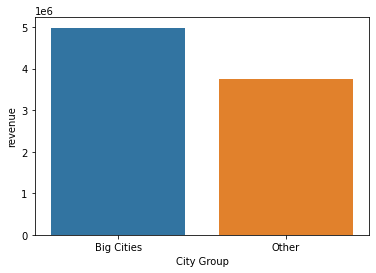

In [14]:
sns.barplot(x='City Group', y='revenue', data=cityPerc)

In [15]:
citygroupDummy = pd.get_dummies(trainData['City Group'])
citygroupD = pd.get_dummies(df['City Group'])
citygroupDummy

,Big Cities,Other
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
132,0,1
133,1,0
134,0,1
135,1,0


In [16]:
trainData = trainData.join(citygroupDummy)
df = df.join(citygroupD)

In [17]:
trainData = trainData.drop('City Group', axis=1)
df = df.drop('City Group', axis=1)

In [18]:
trainData = trainData.drop('Open Date', axis=1)
df = df.drop('Open Date', axis=1)

#we have to label encode the city column but we can't do directly
#so we create a new column of city mean revenue


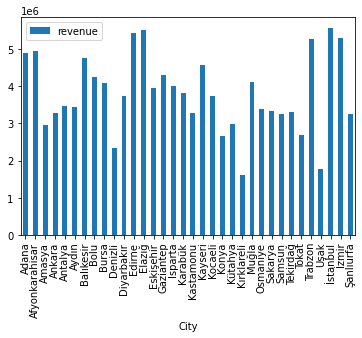

In [19]:
trainData[["City","revenue"]].groupby(["City"]).mean().plot(kind="bar")

In [20]:
mean_revenue_per_city = trainData[['City', 'revenue']].groupby('City', as_index=False).mean()
mean_revenue_per_city['revenue'] = mean_revenue_per_city['revenue'].apply(lambda x: int(x/1e6)) 

In [21]:
mean_revenue_per_city

,City,revenue
0,Adana,4
1,Afyonkarahisar,4
2,Amasya,2
3,Ankara,3
4,Antalya,3
5,Aydın,3
6,Balıkesir,4
7,Bolu,4
8,Bursa,4
9,Denizli,2


In [22]:
mean_dict = dict(zip(mean_revenue_per_city.City, mean_revenue_per_city.revenue))

In [23]:
mean_dict

{'Adana': 4,
 'Afyonkarahisar': 4,
 'Amasya': 2,
 'Ankara': 3,
 'Antalya': 3,
 'Aydın': 3,
 'Balıkesir': 4,
 'Bolu': 4,
 'Bursa': 4,
 'Denizli': 2,
 'Diyarbakır': 3,
 'Edirne': 5,
 'Elazığ': 5,
 'Eskişehir': 3,
 'Gaziantep': 4,
 'Isparta': 4,
 'Karabük': 3,
 'Kastamonu': 3,
 'Kayseri': 4,
 'Kocaeli': 3,
 'Konya': 2,
 'Kütahya': 2,
 'Kırklareli': 1,
 'Muğla': 4,
 'Osmaniye': 3,
 'Sakarya': 3,
 'Samsun': 3,
 'Tekirdağ': 3,
 'Tokat': 2,
 'Trabzon': 5,
 'Uşak': 1,
 'İstanbul': 5,
 'İzmir': 5,
 'Şanlıurfa': 3}

In [24]:
trainData.replace({"City":mean_dict}, inplace=True)

In [25]:
trainData.City.unique()

array([5, 3, 2, 4, 1])

In [26]:
trainData.City.mean()

3.978102189781022

In [27]:
df.City.unique()

array(['Niğde', 'Konya', 'Ankara', 'Kocaeli', 'Afyonkarahisar',
       'Eskişehir', 'Rize', 'İstanbul', 'Trabzon', 'Antalya', 'Muğla',
       'Düzce', 'Adana', 'Bursa', 'Aydın', 'Hatay', 'Denizli', 'İzmir',
       'Gaziantep', 'Samsun', 'Erzurum', 'Edirne', 'Balıkesir', 'Mersin',
       'Zonguldak', 'Malatya', 'Çanakkale', 'Kars', 'Bolu', 'Batman',
       'Bilecik', 'Giresun', 'Tekirdağ', 'Sivas', 'Kırıkkale', 'Mardin',
       'Erzincan', 'Manisa', 'Diyarbakır', 'Kahramanmaraş', 'Yalova',
       'Tanımsız', 'Sakarya', 'Kırşehir', 'Aksaray', 'Kayseri',
       'Nevşehir', 'Çorum', 'Ordu', 'Kırklareli', 'Şanlıurfa', 'Artvin',
       'Uşak', 'Kütahya', 'Siirt', 'Çankırı', 'Isparta'], dtype=object)

In [28]:
df.replace({"City":mean_dict}, inplace=True)

In [29]:
#adding 4 as it was the mean in traindata column

In [30]:
df['City'] = df['City'].apply(lambda x: 4 if isinstance(x,str) else x)

#now looking the Type Column 

In [31]:
trainData.Type.unique()

array(['IL', 'FC', 'DT'], dtype=object)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
lr = LabelEncoder()
lr2=LabelEncoder()

In [34]:
trainData["Type"]=lr.fit_transform(trainData["Type"])
df["Type"]=lr2.fit_transform(df["Type"])

In [35]:
X = trainData.drop(['revenue', 'Id'],axis=1)

In [36]:
X

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P31,P32,P33,P34,P35,P36,P37,OpenDays,Big Cities,Other
0,5,2,4,5.0,4.0,4.0,2,2,5,4,...,3,4,5,5,4,3,4,5647,1,0
1,3,1,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,0,2513,1,0
2,3,2,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,0,663,0,1
3,2,2,6,4.5,6.0,6.0,4,4,10,8,...,12,10,6,18,12,12,6,1064,0,1
4,4,2,3,4.0,3.0,4.0,2,2,5,5,...,1,3,2,3,4,3,3,2063,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,5,1,2,3.0,3.0,5.0,4,2,4,4,...,0,0,0,0,0,0,0,2381,0,1
133,5,1,4,5.0,4.0,4.0,2,3,5,4,...,0,0,0,0,0,0,0,3003,1,0
134,4,1,3,4.0,4.0,4.0,2,3,5,5,...,0,0,0,0,0,0,0,3099,0,1
135,5,1,4,5.0,4.0,5.0,2,2,5,5,...,0,0,0,0,0,0,0,1525,1,0


In [37]:
df = df.drop(['Id'],axis=1)

In [38]:
Y=trainData["revenue"]

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [40]:
from math import sqrt

In [41]:
cv = KFold(n_splits=10, shuffle=True, random_state=108)
model = LGBMRegressor(n_estimators=200, learning_rate=0.01, subsample=0.7, colsample_bytree=0.8)

scores = []
for train_idx, test_idx in cv.split(X):
    X_train = X.iloc[train_idx]
    X_val = X.iloc[test_idx]
    y_train = Y.iloc[train_idx]
    y_val = Y.iloc[test_idx]
    
    model.fit(X_train,y_train)
    preds = model.predict(X_val)
    
    rmse = sqrt(mean_squared_error(y_val, preds))
    print(rmse)
    scores.append(rmse)

print("\nMean score %d"%np.mean(scores))

1859315.9781837382
4014755.584663311
1731588.67787545
1282812.0630591419
1561092.573428195
3149464.128960151
1858838.08140899
1874828.9917743788
1523071.6857608918
2856948.1477960455

Mean score 2171271


In [42]:
predictions = model.predict(df)
predictions

array([4789212.96432691, 3498213.96544588, 3147490.93366051, ...,
       4300649.93588441, 4249874.53676763, 4594246.77405254])

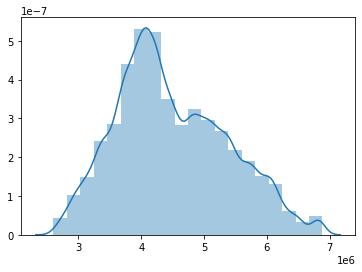

In [43]:
sns.distplot(predictions, bins=20)

#checking the weightage of all the column

In [44]:
import eli5
from eli5.sklearn import PermutationImportance

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [45]:
X = trainData.drop(['revenue', 'Id'],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
perm = PermutationImportance(xgb, random_state=1).fit(X_train,Y_train)
eli5.show_weights(perm, feature_names = X_train.columns.to_list())

Weight,Feature
0.4004 ± 0.0711,City
0.3138 ± 0.0414,P29
0.2580 ± 0.1062,OpenDays
0.1097 ± 0.0322,P17
0.0683 ± 0.0142,P28
0.0502 ± 0.0097,P1
0.0395 ± 0.0223,P27
0.0387 ± 0.0115,P20
0.0305 ± 0.0187,P5
0.0288 ± 0.0179,P6


In [47]:
trainData['P29_to_City_mean'] = trainData.groupby('City')['P29'].transform('mean')
trainData['P17_to_City_mean'] = trainData.groupby('City')['P17'].transform('mean')
trainData['P28_to_City_mean'] = trainData.groupby('City')['P28'].transform('mean')
trainData['P1_to_City_mean'] = trainData.groupby('City')['P1'].transform('mean')
trainData['P27_to_City_mean'] = trainData.groupby('City')['P27'].transform('mean')
trainData['P20_to_City_mean'] = trainData.groupby('City')['P20'].transform('mean')

In [48]:
df['P29_to_City_mean'] = df.groupby('City')['P29'].transform('mean')
df['P17_to_City_mean'] = df.groupby('City')['P17'].transform('mean')
df['P28_to_City_mean'] = df.groupby('City')['P28'].transform('mean')
df['P1_to_City_mean'] = df.groupby('City')['P1'].transform('mean')
df['P27_to_City_mean'] = df.groupby('City')['P27'].transform('mean')
df['P20_to_City_mean'] = df.groupby('City')['P20'].transform('mean')

In [49]:
X = trainData.drop(['revenue', 'Id'],axis=1)

In [50]:
X

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P37,OpenDays,Big Cities,Other,P29_to_City_mean,P17_to_City_mean,P28_to_City_mean,P1_to_City_mean,P27_to_City_mean,P20_to_City_mean
0,5,2,4,5.0,4.0,4.0,2,2,5,4,...,4,5647,1,0,3.214286,1.619048,3.984127,5.031746,1.777778,5.317460
1,3,1,4,5.0,4.0,4.0,1,2,5,5,...,0,2513,1,0,2.843750,0.416667,2.656250,3.145833,0.458333,3.854167
2,3,2,2,4.0,2.0,5.0,2,3,5,5,...,0,663,0,1,2.843750,0.416667,2.656250,3.145833,0.458333,3.854167
3,2,2,6,4.5,6.0,6.0,4,4,10,8,...,6,1064,0,1,4.500000,1.000000,2.583333,3.500000,0.833333,5.666667
4,4,2,3,4.0,3.0,4.0,2,2,5,5,...,3,2063,0,1,3.194444,0.777778,2.527778,3.166667,1.000000,3.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,5,1,2,3.0,3.0,5.0,4,2,4,4,...,0,2381,0,1,3.214286,1.619048,3.984127,5.031746,1.777778,5.317460
133,5,1,4,5.0,4.0,4.0,2,3,5,4,...,0,3003,1,0,3.214286,1.619048,3.984127,5.031746,1.777778,5.317460
134,4,1,3,4.0,4.0,4.0,2,3,5,5,...,0,3099,0,1,3.194444,0.777778,2.527778,3.166667,1.000000,3.722222
135,5,1,4,5.0,4.0,5.0,2,2,5,5,...,0,1525,1,0,3.214286,1.619048,3.984127,5.031746,1.777778,5.317460


#Applying model once again so that we can get our new Model with more accuracy

In [51]:
cv = KFold(n_splits=10, shuffle=True, random_state=108)
model = LGBMRegressor(n_estimators=200, learning_rate=0.01, subsample=0.7, colsample_bytree=0.8)

scores = []
for train_idx, test_idx in cv.split(X):
    X_train = X.iloc[train_idx]
    X_val = X.iloc[test_idx]
    y_train = Y.iloc[train_idx]
    y_val = Y.iloc[test_idx]
    
    model.fit(X_train,y_train)
    preds = model.predict(X_val)
    
    rmse = sqrt(mean_squared_error(y_val, preds))
    print(rmse)
    scores.append(rmse)

print("\nMean score %d"%np.mean(scores))

1844009.0876560577
4004013.5012830435
1704672.141747515
1281403.4168669088
1596609.5442899324
3137342.379374081
1882944.6006180337
1843492.9393876626
1502711.1409468239
2879611.613441217

Mean score 2167681


In [52]:
predictions = model.predict(df)
sample['Prediction'] = predictions

In [53]:
sample

,id,Prediction
0,0,4.836411e+06
1,1,3.906237e+06
2,2,3.301980e+06
3,3,3.028614e+06
4,4,4.058496e+06
...,...,...
99995,99995,4.395664e+06
99996,99996,4.047054e+06
99997,99997,4.199615e+06
99998,99998,4.213450e+06


In [54]:
sample['Prediction']=sample['Prediction'].apply(lambda x: round((float(x/1e6)*1000000),1))

In [55]:
sample['Prediction']

0        4836411.0
1        3906236.5
2        3301980.1
3        3028614.0
4        4058495.9
           ...    
99995    4395664.4
99996    4047054.1
99997    4199614.6
99998    4213450.4
99999    4571625.0
Name: Prediction, Length: 100000, dtype: float64

In [56]:
sample.to_csv('submission.csv', index=False)